In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, date2num, AutoDateLocator, AutoDateFormatter

In [4]:
# Load john hopkins CSV
data = pd.read_csv(r'https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv')

                   

In [5]:
# Just select case data
case_data = data.iloc[:, 0:4]

# Select countries of interest
countries = ['Vietnam', 'Malaysia', 'Philippines', 'Australia']
cases_countries = case_data.loc[case_data['Country/Region'].isin(countries)]

In [6]:
# data check
cases_countries['Country/Region'].value_counts()

# Aus data by states not whole country

Australia      6528
Malaysia        816
Philippines     816
Vietnam         816
Name: Country/Region, dtype: int64

In [7]:
# group by country, to fix aus data
final_cases = cases_countries.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index()

In [8]:
# data check
final_cases['Country/Region'].value_counts()
final_cases.loc[(final_cases['Country/Region'] == "Australia") & (final_cases.Date == "2022-04-10")]

,Date,Country/Region,Confirmed
3236,2022-04-10,Australia,5108366


In [9]:
# convert data to pd.datetime
final_cases.Date = pd.to_datetime(final_cases.Date)

In [10]:
# Data current cumulative cases
# # Calculate new cases per day
temp = final_cases.groupby(['Country/Region', 'Date', ])['Confirmed']
temp = temp.sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
# renaming columns
temp.columns = ['Country/Region', 'Date', 'New_cases']
# merging new values
final_cases = pd.merge(final_cases, temp, on=['Country/Region', 'Date'])
# filling na with 0
final_cases = final_cases.fillna(0)
# fixing data types
cols = ['New_cases']
final_cases[cols] = final_cases[cols].astype('int')
final_cases['New_cases'] = final_cases['New_cases'].apply(lambda x: 0 if x<0 else x)

In [17]:
# Create dataframe for each country and smooth new cases per day to 7-day moving average
vietnam_cases =  final_cases.loc[final_cases['Country/Region'] == 'Vietnam']
vietnam_cases.set_index(vietnam_cases.Date)
vietnam_cases['mov_avg'] = vietnam_cases['New_cases'].rolling(7).sum()

malay_cases = final_cases.loc[final_cases['Country/Region'] == 'Malaysia']
malay_cases.set_index(malay_cases.Date)
malay_cases['mov_avg'] = malay_cases['New_cases'].rolling(7).sum()

phil_cases = final_cases.loc[final_cases['Country/Region'] == 'Philippines']
phil_cases.set_index(phil_cases.Date)
phil_cases['mov_avg'] = phil_cases['New_cases'].rolling(7).sum()

aus_cases = final_cases.loc[final_cases['Country/Region'] == 'Australia']
aus_cases.set_index(aus_cases.Date)
aus_cases['mov_avg'] = aus_cases['New_cases'].rolling(7).sum()

C:\Users\ehug0006\Miniconda3\envs\autumn\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ehug0006\Miniconda3\envs\autumn\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ehug0006\Miniconda3\envs\autumn\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [18]:
# checking data
aus_cases

# 7-day moving average seems very high

,Date,Country/Region,Confirmed,New_cases,mov_avg
0,2020-01-22,Australia,0,0,NaN
4,2020-01-23,Australia,0,0,NaN
8,2020-01-24,Australia,0,0,NaN
12,2020-01-25,Australia,0,0,NaN
16,2020-01-26,Australia,4,4,NaN
20,2020-01-27,Australia,5,1,NaN
24,2020-01-28,Australia,5,0,5.0
28,2020-01-29,Australia,6,1,6.0
32,2020-01-30,Australia,9,3,9.0
36,2020-01-31,Australia,9,0,9.0


C:\Users\ehug0006\Miniconda3\envs\autumn\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


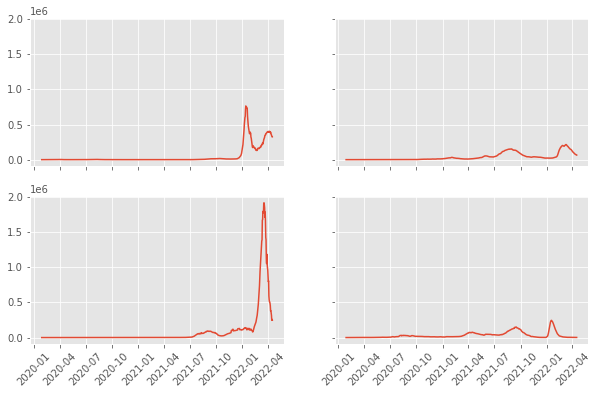

In [19]:
# plotting countries same axis

plt.style.use("ggplot") #plots in ggplot style, handles dates better

# plotting countries
fig, ax = plt.subplots(2, 2, figsize=(10,6), sharex="all", sharey="all")  # Create a figure and an axes.
ax[0,0].plot(aus_cases.Date, aus_cases.mov_avg)
ax[1,0].plot(vietnam_cases.Date, vietnam_cases.mov_avg)
ax[0,1].plot(malay_cases.Date, malay_cases.mov_avg)
ax[1,1].plot(phil_cases.Date, phil_cases.mov_avg)
plt.xticks(rotation=45)
for a in ax.reshape(-1):
    a.tick_params(axis='x', labelrotation=45)
plt.show()